## Урок 4. Домашнее задание 

### 4.1 Домашнее задание начального уровня

Потренируйтесь в программировании на python. Надо будет найти расстояние от каждой точки из массива $X$ до центра кластера, а потом просуммировать эти расстояния. Это будет реализацией библиотечной функции `sklearn.metrics.pairwise.euclidean_distances` из первого урока.  В итоге у Вас должно получиться число чуть более $16$ - это и будет расстояние.
$$
\sum_{i=1}^{k} \mid x_i - c \mid
$$

где для одного обучающего примера x, состоящего из двух координат:
$$
\mid x - c \mid = (x_1-c_1)^2 + (x_2-c_2)^2
$$

**Примечание** Как вы уже знаете из урока про линейную регрессию, в этой формуле должен быть квадратный корень, но для скорости работы мы опускаем его.

**Подсказка** Средствами библиотеки numpy реализуйте формулу нахождения суммы внутрикластерных расстояний

In [109]:
import numpy as np

clust = np.array([
    [-0.5972191612445694, -0.5919098916910581],
    [-1.5838020751869848, 0.4743393635868491],
    [-1.892642118066139, -1.2770390481464395],
    [-1.021761443519372, -0.38446059106320013],
    [-0.628271339507516, -2.308149346281125],
    [-0.7180915776856387, 1.1805550909358404],
    [-1.543143767548152, -1.4163791359687334],
    [0.022103701018375554, -1.1279478858865397],
    [-0.7776518874305778, -0.4157532453316538],
    [-1.2073577296008344, -1.1308523658604184]
])

centroid = np.array([-0.9774245525274352, -0.032635425821084516])

In [110]:
def distance(p1, p2):
    return (p1[0] - p2[0])**2 + (p1[1] - p2[1])**2

s = sum(distance(i, centroid) for i in clust)
s


16.31211696438564

### 4.2 Домашнее задание начального уровня  

Обучите алгоритм k-средних для количества кластеров $n=3$ на том же датасете, который содержится в файле `data/clustering.pkl`. Визуализируйте результат:

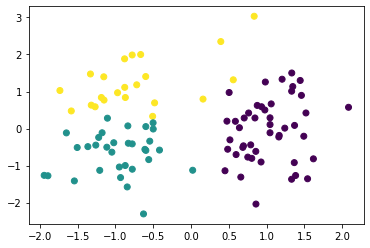

In [111]:
import pickle
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt

with open('clustering.pkl', 'rb') as f:
    X = pickle.load(f)['X']

model = KMeans(n_clusters=3)
model.fit(X)

plt.scatter(X[:, 0], X[:, 1], c=model.labels_)
plt.show()



### 4.3 Домашнее задание высокого уровня

Мы узнали про эвристику, улучшающую алгоритм: запустить несколько раз алгоритм, запомнить, куда попали центроиды при каждом запуске, а потом усреднить координаты за все несколько запуска.

Попробуйте применить эту эвристику на практике: 

* используйте 10 запусков алгоритма $k$-средних для $k=2$ с параметрами kmeans_model = KMeans(n_clusters=2, n_init=1, random_state=None, algorithm='full', max_iter=2)

* в каждом запуске сохраняйте координаты центроидов общий массив $c$. См. `cluster_centers_ : array, [n_clusters, n_features]`
* визуализируйте координаты точек из $c$ на фоне исходного множества точек

Результат будет примерно такой:
![several_init_knn](https://248006.selcdn.ru/public/DS.%20Block%202.%20M7/several_init_knn.png)

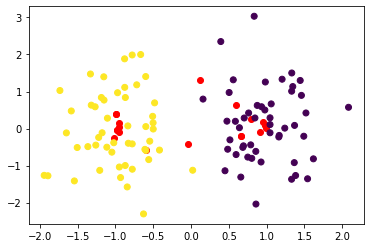

In [112]:
model = KMeans(n_clusters=2, n_init=1, max_iter=2) # остальные параметры по умолчанию
c = np.empty([10], dtype=object)

for i in range(10):
    model.fit(X)
    c[i] = model.cluster_centers_
    for cluster in c[i]:
        plt.scatter(cluster[0], cluster[1], c='r')

plt.scatter(X[:, 0], X[:, 1], c=model.predict(X))

Мы выяснили, что один из недостатков алгоритма k-средних состоит в том, что количество кластеров надо задать до тренировки модели, но как же определить, сколько будет кластеров в данных? Для этой задачи существует эффективный алгоритм, о котором мы поговорим в следующем уроке.